# Fitting experimental data to thermodynamic models

Besides calculating and visualizing phase equilibria using known models, **pycalphad** also enables you to fit experimental data to a parameterized thermodynamic model. While pycalphad handles construction of the energy functions and equilibrium calculation, a separate module handles the numerical details of fitting disparate sources of data to the thermodynamic functions.

Here we consider the case study of the **Al-Mg-Zn** system. First, we use a TDB file as the setup for our model parameterizations. Note that not all of the parameters have not been filled in. These are what we will fit.

A+BT+CTln(T)+DT2+E/T+FT3 

**Model parametrization:** Liang, H., Chen, S. L., & Chang, Y. A. (1997). A thermodynamic description of the Al-Mg-Zn system. _Metallurgical and Materials Transactions A_, 28(9), 1725-1734.

In [2]:
%matplotlib inline

TDB_STR = """
$=============================================================================
$
$  Al-Mg-Zn System, almgzn.tdb
$  Parameterized by R. Otis from an Al-Cu-Mg-Zn database, 04-13-2015
$  Last updated: 01-07-1997 by H. Liang
$                                             
$  Based on Al-Mg-Zn[96Liang]
$
$=============================================================================
$
 ELEMENT /-   ELECTRON_GAS              0.0000E+00  0.0000E+00  0.0000E+00!
 ELEMENT VA   VACUUM                    0.0000E+00  0.0000E+00  0.0000E+00!
 ELEMENT AL   FCC_A1                    2.6982E+01  4.5773E+03  2.8322E+01!
 ELEMENT MG   HCP_A3                    2.4305E+01  4.9980E+03  3.2671E+01!
 ELEMENT ZN   HCP_A3                    6.5380E+01  5.6567E+03  4.1631E+01!

 
 FUNCTION UN_ASS     2.98140E+02  0.0;  3.00000E+02  N !
 FUNCTION GHSERAL    2.98130E+02  -7976.15+137.071542*T-24.3671976*T*LN(T)
     -.001884662*T**2-8.77664E-07*T**3+74092*T**(-1);  7.00000E+02  Y
      -11276.24+223.02695*T-38.5844296*T*LN(T)+.018531982*T**2
     -5.764227E-06*T**3+74092*T**(-1);  9.33600E+02  Y
      -11277.683+188.661987*T-31.748192*T*LN(T)-1.234264E+28*T**(-9);
     2.90000E+03  N !
 FUNCTION GHSERMG    2.98130E+02  -8367.34+143.677875*T-26.1849782*T*LN(T)
     +4.858E-04*T**2-1.393669E-06*T**3+78950*T**(-1);  9.23000E+02  Y
      -14130.185+204.718543*T-34.3088*T*LN(T)+1.038192E+28*T**(-9);
     3.00000E+03  N !
 FUNCTION GHSERZN    2.98140E+02  -7285.787+118.470069*T-23.701314*T*LN(T)
   -.001712034*T**2-1.264963E-06*T**3;  6.92680E+02  Y
   -11070.559+172.34566*T-31.38*T*LN(T)+4.70514E+26*T**(-9);
     1.70000E+03  N !
$
 FUNCTION GALLIQ     2.98130E+02  +11005.553-11.840873*T+7.9401E-20*T**7
     +GHSERAL#;  9.33600E+02  Y
      +10481.974-11.252014*T+1.234264E+28*T**(-9)+GHSERAL#;  
     2.90000E+03  N !
 FUNCTION GMGLIQ     2.98130E+02  +8202.24-8.83693*T-8.01759E-20*T**7
     +GHSERMG#;  9.23000E+02  Y
      +8690.32-9.39216*T-1.03819E+28*T**(-9)+GHSERMG#;  3.00000E+03  N !
 FUNCTION GZNLIQ     2.70000E+02  -128.517+108.176926*T-23.701314*T*LN(T)
     -.001712034*T**2-1.264963E-06*T**3-3.58652E-19*T**7;  6.92730E+02  Y
      -3620.474+161.608677*T-31.38*T*LN(T);  2.90000E+03  N !
$
 FUNCTION GBCCAL  2.98150E+02  +10083-4.813*T+GHSERAL#; 6.00000E+03  N !
 FUNCTION GBCCZN  2.98150E+02  +2886.96-2.5104*T+GHSERZN#;
		  6.00000E+03  N !
 FUNCTION GFCCZN  2.98150E+02  +2969.82-1.56968*T+GHSERZN#;
		  6.00000E+03  N !
 FUNCTION GFCCMG  2.98150E+02  2600-0.9*T+GHSERMG#;
		  6.00000E+03 N !

 TYPE_DEFINITION % SEQ *!
 DEFINE_SYSTEM_DEFAULT SPECIE 2 !
 DEFAULT_COMMAND DEF_SYS_ELEMENT VA !
 
 PHASE LIQUID:L %  1  1.0  !
    CONSTITUENT LIQUID:L :AL,MG,ZN :  !
 
   PARAMETER G(LIQUID,AL;0)  2.98130E+02  +GALLIQ#;
			     3.00000E+03  N REF: 0 !
   PARAMETER G(LIQUID,MG;0)  2.98130E+02  +GMGLIQ#;  
			     3.00000E+03  N REF: 0 !
   PARAMETER G(LIQUID,ZN;0)  2.98130E+02  +GZNLIQ#;  
			     3.00000E+03  N REF: 0 !
   PARAMETER G(LIQUID,AL,MG;0)  2.98150E+02  LIQALMG0A+LIQALMG0B*T;   
				6.00000E+03  N REF: 0 !
   PARAMETER G(LIQUID,AL,ZN;0)  2.98150E+02  LIQALZN0A+LIQALZN0B*T;
				6.00000E+03   N REF: 3 !
   PARAMETER G(LIQUID,AL,ZN;1)  2.98150E+02  LIQALZN1A+LIQALZN1B*T;
				6.00000E+03   N REF: 3 !                      
   PARAMETER G(LIQUID,MG,ZN;0) 298.15  LIQMGZN0A+LIQMGZN0B*T+LIQMGZN0C*T*LN(T); 
			       6000.0   N REF: 4 ! 
   PARAMETER G(LIQUID,MG,ZN;1) 298.15  LIQMGZN1A+LIQMGZN1B*T; 
			       6000.0 N REF: 4 ! 
   PARAMETER G(LIQUID,MG,ZN;2) 298.15  LIQMGZN2A;   
			       6000.0   N REF:   4 ! 
$
   PARAMETER G(LIQUID,AL,MG,ZN;0) 298.15 LIQALMGZN0A;  
				  6000.0  N REF:  0 !
   PARAMETER G(LIQUID,AL,MG,ZN;1) 298.15 LIQALMGZN1A; 
				  6000.0 N REF:  0 !
   PARAMETER G(LIQUID,AL,MG,ZN;2) 298.15 LIQALMGZN2A;  
				  6000.0  N REF:  0 !

$----------------------------------------------------------------------
 TYPE_DEFINITION ' GES A_P_D FCC_A1 MAGNETIC  -3.0    2.80000E-01 !

 PHASE FCC_A1  %'  2 1   1 !
    CONSTITUENT FCC_A1  :AL%,MG,ZN : VA% :  !
 
   PARAMETER G(FCC_A1,AL:VA;0)  2.98130E+02  +GHSERAL#;  
				2.90000E+03  N REF:  0 !
   PARAMETER G(FCC_A1,MG:VA;0)  2.98130E+02  +2600-.9*T+GHSERMG#;
				3.00000E+03  N REF: 0 !
   PARAMETER G(FCC_A1,ZN:VA;0)  2.98150E+02  +2969.82-1.56968*T+GHSERZN#;
				6.00000E+03   N REF: 1 !
   PARAMETER G(FCC_A1,AL,MG:VA;0)  2.98150E+02  FCCALMG0A+FCCALMG0B*T;
				   6.00000E+03   N REF: 0 !
   PARAMETER G(FCC_A1,AL,MG:VA;1)  2.98150E+02  FCCALMG1A+FCCALMG1B*T;
				   6.00000E+03   N REF: 0 !
   PARAMETER G(FCC_A1,AL,ZN:VA;0)  2.98150E+02  FCCALZN0A+FCCALZN0B*T;
				   6.00000E+03   N REF: 3 !
   PARAMETER G(FCC_A1,AL,ZN:VA;1)  2.98150E+02  FCCALZN1A+FCCALZN1B*T;
				   6.00000E+03   N REF: 3 !
   PARAMETER G(FCC_A1,AL,ZN:VA;2)  2.98150E+02  FCCALZN2A+FCCALZN2B*T;
				   6.00000E+03   N REF: 3 !
   PARAMETER G(FCC_A1,MG,ZN:VA;0)  2.98150E+02  FCCMGZN0A; 
				   6000.0        N REF: 4 !
   PARAMETER G(FCC_A1,AL,MG,ZN:VA;0) 298.15 FCCALMGZN0A;  
				     6000.0  N REF:  0 !
   
$----------------------------------------------------------------------

 TYPE_DEFINITION ( GES A_P_D HCP_A3 MAGNETIC  -3.0    2.80000E-01 !
 
 PHASE HCP_A3  %(  2 1   .5 !
    CONSTITUENT HCP_A3  :AL,MG%,ZN : VA% :  !
 
   PARAMETER G(HCP_A3,AL:VA;0)  2.98130E+02  +5481-1.8*T+GHSERAL#;
				2.90000E+03  N REF: 0 !
   PARAMETER G(HCP_A3,MG:VA;0)  2.98130E+02  +GHSERMG#;  
				3.00000E+03  N REF:  0 !
   PARAMETER G(HCP_A3,ZN:VA;0)  2.98150E+02  +GHSERZN#;
				6.00000E+03   N REF: 1 !
   PARAMETER G(HCP_A3,AL,MG:VA;0)  2.98150E+02  HCPALMG0A+HCPALMG0B*T;
				   6.00000E+03   N REF: 0 !
   PARAMETER G(HCP_A3,AL,MG:VA;1)  2.98150E+02  HCPALMG1A;   
				   6.00000E+03   N  REF: 0 !
   PARAMETER G(HCP_A3,AL,ZN:VA;0)  2.98150E+02  HCPALZN0A;
				   6.00000E+03   N REF: 3 !
   PARAMETER G(HCP_A3,MG,ZN:VA;0) 298.15  HCPMGZN0A+HCPMGZN0B*T; 
				  6000.0 N REF: 4 !
   PARAMETER G(HCP_A3,MG,ZN:VA;1) 298.15  HCPMGZN1A+HCPMGZN1B*T; 
				  6000.0 N REF: 4 !

$-------------------------------------------------------------------

  PHASE SIGMA  %  2 .66667    .33333 !
    CONSTITUENT SIGMA  :AL,ZN : MG :  !
 
   PARAMETER G(SIGMA,AL:MG;0)  2.98150E+02  +20133.73+6.3946*T
			       +.66667*GALLIQ#+.33333*GMGLIQ#;  
			       3.00000E+03  N REF: 0 !
   PARAMETER G(SIGMA,ZN:MG;0)  2.98150E+02  -19389.65+13.644*T
			       +.66667*GZNLIQ#+.33333*GMGLIQ#; 
			       3.00000E+03  N REF: 0 ! 
   PARAMETER G(SIGMA,AL,ZN:MG;0) 2.98150E+02  SIGALZN0A;  
				 3.00000E+03  N  REF: 0 !
   PARAMETER G(SIGMA,AL,ZN:MG;1) 2.98150E+02  SIGALZN1A;  
				 3.00000E+03  N  REF: 0 !

$----------------------------------------------------------------

 PHASE T  %  2 .605   .395 !
    CONSTITUENT T  :AL,ZN : MG :  !
 
   PARAMETER G(T,AL:MG;0)  2.98150E+02  -10910.836+8.71*T
			   +.605*GALLIQ#+.395*GMGLIQ#;  
			   3.00000E+03  N REF: 0 !
   PARAMETER G(T,ZN:MG;0)  2.98150E+02  -15733.501+12.6746*T
			   +.605*GZNLIQ#+.395*GMGLIQ#;  
			   3.00000E+03  N REF: 0 !
   PARAMETER G(T,AL,ZN:MG;0)  2.98150E+02  TALZN0A+TALZN0B*T;  
			      3.00000E+03  N  REF: 0 !
   PARAMETER G(T,AL,ZN:MG;1)  2.98150E+02  TALZN1A;  
			      3.00000E+03  N REF:   0 !
$----------------------------------------------------------------- 

 PHASE EPS  %  2 1   1 !
    CONSTITUENT EPS  :AL,MG,ZN : VA :  !

   PARAMETER G(EPS,AL:VA;0)  2.98150E+02   5481-1.8*T+GHSERAL#;
			     6.00000E+03 N REF: 0 !
   PARAMETER G(EPS,MG:VA;0)  2.98150E+02  +10+GFCCMG#;     
			     6.00000E+03 N REF: 0 !
   PARAMETER G(EPS,ZN:VA;0)  2.98150E+02  +GFCCZN#;
			     6.00000E+03   N REF: 0 !
   PARAMETER G(EPS,AL,ZN:VA;0)  2.98150E+02   EPSALZN0A;
				6.00000E+03   N REF: 0 !
                
$-----------------------------------------------------------------              

 TYPE_DEFINITION & GES A_P_D BCC_A2 MAGNETIC  -1.0    4.00000E-01 !
 
  PHASE BCC_A2  %  2 1   3 !
    CONSTITUENT BCC_A2  :AL,ZN : VA% :  !

   PARAMETER G(BCC_A2,AL:VA;0)  2.98150E+02  +10083-4.813*T+GHSERAL#;
				6.00000E+03   N REF: 1 !
   PARAMETER G(BCC_A2,ZN:VA;0)  2.98150E+02  +2886.96-2.5104*T+GHSERZN#;
				6.00000E+03   N REF: 1 !
   PARAMETER G(BCC_A2,AL,ZN:VA;0)  2.98150E+02   BCCALZN0A;
				   6.00000E+03  N REF: 0 !

$------------------------------------------------------------------
 
PHASE GAMMA  %  2 1   1 !
    CONSTITUENT GAMMA  :AL,ZN : VA :  !

   PARAMETER G(GAMMA,AL:VA;0)  2.98150E+02  +GHSERAL#+10.0;   
			       6.00000E+03  N  REF: 0 !
   PARAMETER G(GAMMA,ZN:VA;0)  2.98150E+02  +GHSERZN#+10.0;   
			       6.00000E+03  N  REF: 0 !
   PARAMETER G(GAMMA,AL,ZN:VA;0)  2.98150E+02  GAMALZN0A;
				  6.00000E+03  N REF: 0 !
$---------------------------------------------------------------------

 PHASE PHI  %  3  2  5  2 !
    CONSTITUENT PHI  :AL : MG : ZN :  !

  PARAMETER G(PHI,AL:MG:ZN;0)    298.15  -169985.46+136.8*T
	+2*GALLIQ#+5*GMGLIQ#+2*GZNLIQ#;  6000.0 N REF: 0 !


$====================================================================== 
$              Binary Intermetallic Phases
$======================================================================
 
$---------------------------------------------------------------------

 PHASE ALMG_BETA  %  2 .615   .385 !
    CONSTITUENT ALMG_BETA  :AL : MG :  !
 
   PARAMETER G(ALMG_BETA,AL:MG;0)  2.98150E+02  -1451.1-1.907*T
	      +.615*GHSERAL#+.385*GHSERMG#;   6.00000E+03   N REF: 0 !
 
$---------------------------------------------------------------------
 
 PHASE ALMG_EPSILON  %  2 .56   .44 !
    CONSTITUENT ALMG_EPSILON  :AL : MG :  !
 
   PARAMETER G(ALMG_EPSILON,AL:MG;0)  2.98150E+02  -768.6-3.119*T
	       +.56*GHSERAL#+.44*GHSERMG#;   6.00000E+03   N REF: 0 !

$---------------------------------------------------------------------- 
 
 PHASE ALMG_GAMMA  %  3 .4483   .1379   .4138 !
    CONSTITUENT ALMG_GAMMA  :MG : AL,MG : AL,MG :  !
 
   PARAMETER G(ALMG_GAMMA,MG:AL:AL;0)  2.98150E+02  -1270-1.75*T
	   +.5517*GHSERAL#+.4483*GHSERMG#;  6.00000E+03   N REF: 0 !
   PARAMETER G(ALMG_GAMMA,MG:MG:AL;0)  2.98150E+02  -2441.4+.219*T
	   +.4138*GHSERAL#+.5862*GHSERMG#;   6.00000E+03   N REF: 0 !
   PARAMETER G(ALMG_GAMMA,MG:AL:MG;0)  2.98150E+02  +1279.6+1.1606*T
	   +.1379*GHSERAL#+.8621*GHSERMG#;   6.00000E+03   N REF: 0 !
   PARAMETER G(ALMG_GAMMA,MG:MG:MG;0)  2.98150E+02  +5000+GHSERMG#;
	   6.00000E+03   N REF: 0 !

$---------------------------------------------------------------------- 
$ 
 PHASE ALMG_ZETA  %  2 .525   .475 !
    CONSTITUENT ALMG_ZETA  :AL : MG :  !
 
   PARAMETER G(ALMG_ZETA,AL:MG;0)  2.98150E+02  -837.8-3.163*T
	    +.525*GHSERAL#+.475*GHSERMG#;   6.00000E+03   N REF: 0 !
 
$----------------------------------------------------------------------
$
 PHASE MG2ZN11  %  2 .153846   .846154 !
    CONSTITUENT MG2ZN11  :MG : ZN :  !
 
  PARAMETER G(MG2ZN11,MG:ZN;0)  298.15  -5823.05+1.94323*T
  +0.153846154*GHSERMG#+0.846153846*GHSERZN#;   6000.0   N REF: 4 !
$
$-----------------------------------------------------------------------
$
 PHASE MG2ZN3  %  2 .4   .6 !
    CONSTITUENT MG2ZN3  :MG : ZN :  !
 
  PARAMETER G(MG2ZN3,MG:ZN;0)  298.15  -11014.5+3.67151*T+0.4*GHSERMG#
			       +0.6*GHSERZN#;   6000.0   N REF: 4 !
$
$-----------------------------------------------------------------------
$
 PHASE MG7ZN3  %  2 .71831   .28169 !
    CONSTITUENT MG7ZN3  :MG : ZN :  !
 
  PARAMETER G(MG7ZN3,MG:ZN;0)  298.15  -4814.11+T+0.71831*GHSERMG#
			       +0.28169*GHSERZN#;   6000.0   N REF: 4 !
$
$-----------------------------------------------------------------------
$
 PHASE MGZN  %  2 .48   .52 !
    CONSTITUENT MGZN  :MG : ZN :  !
 
  PARAMETER G(MGZN,MG:ZN;0)  298.15  -9590.44+3.19681*T+0.48*GHSERMG#
			     +0.52*GHSERZN#;   6000.0   N REF: 4 !
$

$===========================================================================
"""

from pycalphad import Database, Model, binplot
import pycalphad.variables as v
import matplotlib.pyplot as plt
from sympy import Symbol

dbf = Database(TDB_STR)

## Prior to fitting

First, we'll show what the phase diagram looks like without any binary interaction parameters. In this diagram only the pure component lattice stabilities of each phase relative to their standard states are considered.

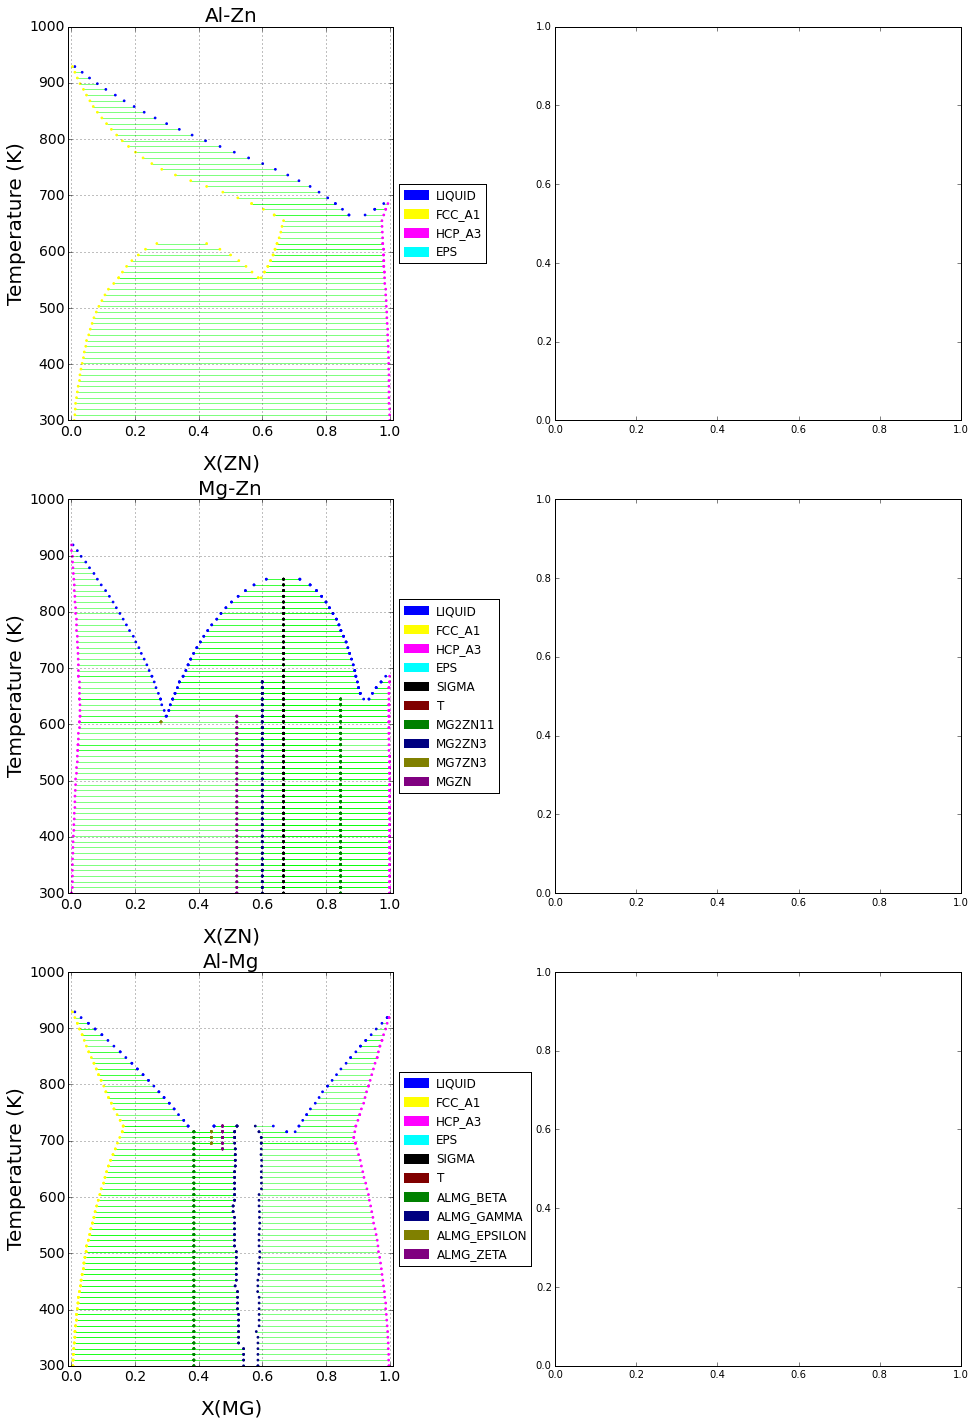

In [5]:
liang96_parameters = {
    'LIQALMG0A':   -11200,
    'LIQALMG0B':   9.578,
    'LIQALZN0A':   10288.0,
    'LIQALZN0B':   -3.035,
    'LIQALZN1A':   -810.0,
    'LIQALZN1B':   0.471,
    'LIQMGZN0A':   -81439.68,
    'LIQMGZN0B':   518.25,
    'LIQMGZN0C':   -64.7144,
    'LIQMGZN1A':   2627.54,
    'LIQMGZN1B':   2.93061,
    'LIQMGZN2A':   -1673.28,
    'LIQALMGZN0A': -4094.48,
    'LIQALMGZN1A': -39973.74,
    'LIQALMGZN2A': -11337.52,
    'FCCALMG0A':   4945.7,
    'FCCALMG0B':   -1.318,
    'FCCALMG1A':   1594.4,
    'FCCALMG1B':   -.973,
    'FCCALZN0A':   6656.0,
    'FCCALZN0B':   1.615,
    'FCCALZN1A':   6793.0,
    'FCCALZN1B':   -4.982,
    'FCCALZN2A':   -5352.0,
    'FCCALZN2B':   7.261,
    'FCCMGZN0A':   18000,
    'FCCALMGZN0A': -20000,
    'HCPALMG0A':   4063.4,
    'HCPALMG0B':   -3.243,
    'HCPALMG1A':   -1642.1,
    'HCPALZN0A':   14620,
    'HCPMGZN0A':   -1600.77,
    'HCPMGZN0B':   7.62441,
    'HCPMGZN1A':   -3823.03,
    'HCPMGZN1B':   8.02575,
    'SIGALZN0A':   -23927.13,
    'SIGALZN1A':   9335.47,
    'TALZN0A':     -25696.19,
    'TALZN0B':     25,
    'TALZN1A':     9153.84,
    'EPSALZN0A':   10000,
    'BCCALZN0A':   20000,
    'GAMALZN0A':   75000
    }
blank_parameters = {
    'LIQALMG0A': 0.0,
    'LIQALMG0B': 0.0,
    'LIQALZN0A': 0.0,
    'LIQALZN0B': 0.0,
    'LIQALZN1A': 0.0,
    'LIQALZN1B': 0.0,
    'LIQMGZN0A': 0.0,
    'LIQMGZN0B': 0.0,
    'LIQMGZN0C': 0.0,
    'LIQMGZN1A': 0.0,
    'LIQMGZN1B': 0.0,
    'LIQMGZN2A': 0.0,
    'LIQALMGZN0A': 0.0,
    'LIQALMGZN1A': 0.0,
    'LIQALMGZN2A': 0.0,
    'FCCALMG0A': 0.0,
    'FCCALMG0B': 0.0,
    'FCCALMG1A': 0.0,
    'FCCALMG1B': 0.0,
    'FCCALZN0A': 0.0,
    'FCCALZN0B': 0.0,
    'FCCALZN1A': 0.0,
    'FCCALZN1B': 0.0,
    'FCCALZN2A': 0.0,
    'FCCALZN2B': 0.0,
    'FCCMGZN0A': 0.0,
    'FCCALMGZN0A': 0.0,
    'HCPALMG0A': 0.0,
    'HCPALMG0B': 0.0,
    'HCPALMG1A': 0.0,
    'HCPALZN0A': 0.0,
    'HCPMGZN0A': 0.0,
    'HCPMGZN0B': 0.0,
    'HCPMGZN1A': 0.0,
    'HCPMGZN1B': 0.0,
    'SIGALZN0A': 0.0,
    'SIGALZN1A': 0.0,
    'TALZN0A': 0.0,
    'TALZN0B': 0.0,
    'TALZN1A': 0.0,
    'EPSALZN0A': 0.0,
    'BCCALZN0A': 0.0,
    'GAMALZN0A': 0.0
    }

phases_alzn = ['LIQUID', 'FCC_A1', 'HCP_A3', 'EPS']
phases_mgzn = ['LIQUID', 'FCC_A1', 'HCP_A3', 'EPS', 'SIGMA', 'T', 'MG2ZN11', 'MG2ZN3', 'MG7ZN3', 'MGZN']
phases_almg = ['LIQUID', 'FCC_A1', 'HCP_A3', 'EPS', 'SIGMA', 'T', 'ALMG_BETA', 'ALMG_GAMMA',
               'ALMG_EPSILON', 'ALMG_ZETA']

alzn_models = {name: Model(dbf, ['AL', 'ZN', 'VA'], name, parameters=liang96_parameters) for name in phases_alzn}
mgzn_models = {name: Model(dbf, ['MG', 'ZN', 'VA'], name, parameters=liang96_parameters) for name in phases_mgzn}
almg_models = {name: Model(dbf, ['AL', 'MG', 'VA'], name, parameters=liang96_parameters) for name in phases_almg}

fig, axarr = plt.subplots(nrows=3, ncols=2, figsize=(16, 24))
axarr[0,0] = binplot(dbf, ['AL', 'ZN', 'VA'], phases_alzn, 'X(ZN)', 300, 1000, ax=axarr[0,0], model=alzn_models)
axarr[1,0] = binplot(dbf, ['MG', 'ZN', 'VA'], phases_mgzn, 'X(ZN)', 300, 1000, ax=axarr[1,0], model=mgzn_models)
axarr[2,0] = binplot(dbf, ['AL', 'MG', 'VA'], phases_almg, 'X(MG)', 300, 1000, ax=axarr[2,0], model=almg_models)


Now load a test Comma-Separated Values (CSV) file with some phase equilibria data. This data could be from experiment, *ab-initio* methods or another source. Let's plot the data on top of our phase diagram to get an idea of what we're dealing with here.

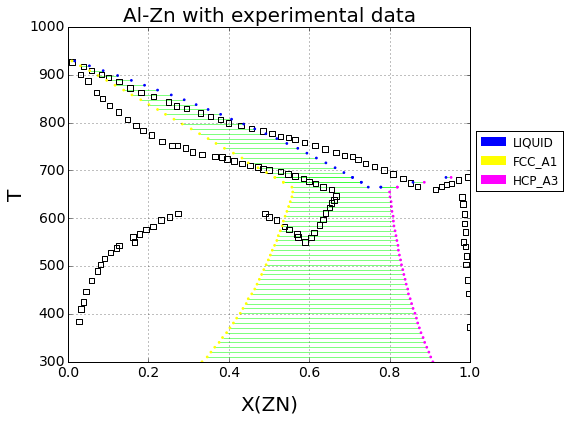

In [15]:
import pandas as pd
from pycalphad.plot.utils import phase_legend

phase_eq = pd.read_csv('alzn_test_phase_eq.csv')

fig = plt.figure(figsize=(9,6))
ax = binplot(db_alzn, ['AL', 'ZN', 'VA'] , my_phases_alzn, 'X(ZN)', 300, 1000, ax=plt.gca(), model=models)
ax.set_title('Al-Zn with experimental data', fontsize=20)
legend_handles, colors = phase_legend(my_phases_alzn)
for phase, phase_df in phase_eq.groupby('Phase'):
    ax = phase_df.plot(kind='scatter', x='X(ZN)', y='T', ax=ax, edgecolor='black',
                       s=30, xlim=(0,1), marker='s', facecolor='none')
ax = ax.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.6))

## Starting parameter values
Let's imagine we have some way (first-principles calculations, intuition or both) to guess some starting values for our parameters.

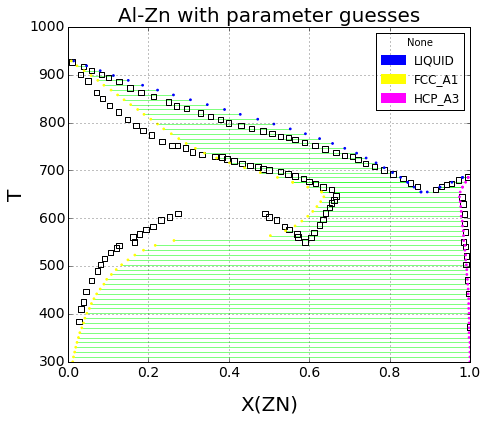

In [6]:
perturbed_parameters = {
    'LIQALZN0H': 10000,
    'LIQALZN0S': 3,
    'FCCALZN0H': 7000,
    'FCCALZN0S': -0.2,
    'FCCALZN1H': 5000,
    'FCCALZN1S': 4,
    'FCCALZN2H': -3000,
    'FCCALZN2S': -3,
    'HCPALZN0H': 17000,
    'HCPALZN0S': 6,
    'HCPALZN3H': -700,
    'HCPALZN3S': 1
    }
fit_models = {
    'LIQUID': Model(db_alzn, ['AL', 'ZN'], 'LIQUID', parameters=perturbed_parameters),
    'FCC_A1': Model(db_alzn, ['AL', 'ZN', 'VA'], 'FCC_A1', parameters=perturbed_parameters),
    'HCP_A3': Model(db_alzn, ['AL', 'ZN', 'VA'], 'HCP_A3', parameters=perturbed_parameters)
    }

fig = plt.figure(figsize=(9,6))
ax = binplot(db_alzn, ['AL', 'ZN', 'VA'] , my_phases_alzn, 'X(ZN)', 300, 1000, ax=plt.gca(), model=fit_models)
ax = phase_eq.plot(kind='scatter', x='X(ZN)', y='T', ax=ax, edgecolor='black',
                       s=30, xlim=(0,1), marker='s', facecolor='none')
ax = ax.set_title('Al-Zn with parameter guesses', fontsize=20)

## Constructing a residual and performing a fit

We construct a residual function based on distance from the equilibrium hyperplane (driving force). In the future this routine and others will be wrapped up in a library.

In [7]:
import pandas as pd
import numpy as np
from pycalphad.eq.energy_surf import energy_surf
from pycalphad.eq.geometry import lower_convex_hull
from pycalphad.eq.equilibrium import EquilibriumError
from pycalphad.eq.utils import make_callable
from pycalphad.log import logger
    
#For each temperature in the input experiment data file,
#  calculate the energy surface with energy_surf
#  for each equilibrium in the data file at this temperature,
#    calculate lower_convex_hull for the specified conditions
#    get the chemical potentials of the returned simplex
#    use the potentials to calculate driving force for all phases at _each specified point_
#    For phases that should be present, take the driving force at the specified points as the residual.
#    For phases not present, define a barrier function that increases the residual rapidly once it gets too close to zero DF.

def residual_equilibrium(x, parnames, data):
    "Return an array with the residual for each experimentally defined equilibrium in 'data'."
    params = dict(zip(parnames, x))
    iter_models = {
        'LIQUID': Model(db_alzn, ['AL', 'ZN'], 'LIQUID', parameters=params),
        'FCC_A1': Model(db_alzn, ['AL', 'ZN', 'VA'], 'FCC_A1', parameters=params),
        'HCP_A3': Model(db_alzn, ['AL', 'ZN', 'VA'], 'HCP_A3', parameters=params)
        }
    eqres = np.zeros(len(data))
    temps = sorted(list(set(data['T'].values)))
    all_energy_data = energy_surf(db_alzn, ['AL', 'ZN', 'VA'], ['LIQUID', 'FCC_A1', 'HCP_A3'], T=temps,
                                   model=iter_models)
    idx = 0
    for temp, temp_df in data.groupby('T'):
        surface_data = all_energy_data.loc[all_energy_data['T'] == temp]
        for eqid, eq_df in temp_df.groupby('ID'):
            # hardcode some of these details for now
            conditions = {v.X('ZN'): eq_df.iloc[0]['X(ZN)']}
            phase_compositions, phase_fracs, pots = \
                    lower_convex_hull(surface_data, ['AL', 'ZN', 'VA'], conditions)
            if phase_compositions is None:
                raise EquilibriumError('Unable to calculate equilibrium for T={0}, {1}'.format(temp, conditions))
            for rowid, eq in eq_df.iterrows():
                phase = eq['Phase'].upper().split('#')[0]
                nearest_idx = np.argmin(np.abs(surface_data.loc[surface_data['Phase'] == phase]['X(ZN)'].values - eq['X(ZN)']))
                phase_energy = surface_data.loc[surface_data['Phase'] == phase].iloc[nearest_idx]['GM']
                local_compositions = np.array([1-eq['X(ZN)'], eq['X(ZN)']])
                driving_force = phase_energy - np.dot(pots, local_compositions)
                eqres[idx] = driving_force
                idx += 1
    return eqres

We perform the fit using the **leastsq** routine in scipy.

CPU times: user 1min 18s, sys: 61 ms, total: 1min 18s
Wall time: 1min 18s
sum of squares: 4.4135148449423065


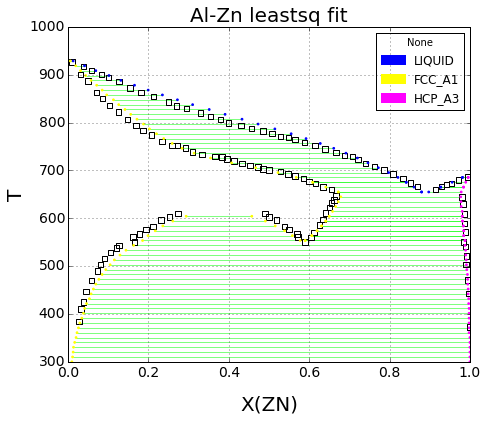

In [9]:
from scipy.optimize import leastsq
import numpy as np

perturbed_parameters = {
    'LIQALZN0H': 10000,
    'LIQALZN0S': 3,
    'FCCALZN0H': 7000,
    'FCCALZN0S': -0.2,
    'FCCALZN1H': 5000,
    'FCCALZN1S': 4,
    'FCCALZN2H': -3000,
    'FCCALZN2S': -3,
    'HCPALZN0H': 17000,
    'HCPALZN0S': 6,
    'HCPALZN3H': -700,
    'HCPALZN3S': 1
    }

param_names, param_values = list(zip(*perturbed_parameters.items()))
phase_eq = pd.read_csv('alzn_test_phase_eq.csv')
param_values = np.array(param_values)

%time out = leastsq(residual_equilibrium, param_values, args=(param_names, phase_eq.ix[0:13]), full_output=True, maxfev=100)
solution = out[0]
#print(out)
result = dict(zip(param_names, solution))
ssq = np.linalg.norm(residual_equilibrium(solution, param_names, phase_eq.ix[0:13]))
print('sum of squares: {0}'.format(ssq))

fit_models = {
    'LIQUID': Model(db_alzn, ['AL', 'ZN'], 'LIQUID', parameters=result),
    'FCC_A1': Model(db_alzn, ['AL', 'ZN', 'VA'], 'FCC_A1', parameters=result),
    'HCP_A3': Model(db_alzn, ['AL', 'ZN', 'VA'], 'HCP_A3', parameters=result)
    }

fig = plt.figure(figsize=(9,6))
ax = binplot(db_alzn, ['AL', 'ZN', 'VA'] , my_phases_alzn, 'X(ZN)', 300, 1000, ax=plt.gca(), model=fit_models)
ax = phase_eq.plot(kind='scatter', x='X(ZN)', y='T', ax=ax, edgecolor='black',
                       s=30, xlim=(0,1), marker='s', facecolor='none')
ax = ax.set_title('Al-Zn leastsq fit', fontsize=20)

## Getting the fitted parameters
The **result** object contains the fitted values for the parameters.

In [16]:
print(result)

{'FCCALZN0H': 7116.1695644371157, 'LIQALZN0S': 3.0, 'HCPALZN3S': 1.1947269998301127, 'HCPALZN0H': 17101.168346255559, 'FCCALZN2H': -3100.0366210462989, 'FCCALZN1H': 5441.3243685395564, 'FCCALZN2S': -2.6634196038803224, 'FCCALZN1S': 3.2075773258616032, 'HCPALZN3H': -806.74268262068131, 'HCPALZN0S': 5.816272565695229, 'FCCALZN0S': -0.40729275409317195, 'LIQALZN0H': 10000.0}


## Comparing with previous work

Next, we show values from Mey et al.'s 1993 assessment of the Al-Zn system. We have not done any fitting here; we are just showing how arbitrary values for the parameters may be specified and easily used to plot the phase diagram. Note the optional *parameters* keyword argument specified for each call to **Model**. This feature is what makes it easy to perform arbitrary variable substitutions in our thermodynamic models.

CPU times: user 1.49 s, sys: 14 ms, total: 1.51 s
Wall time: 1.5 s


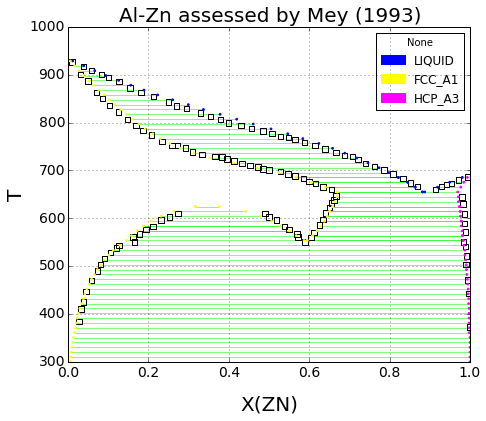

In [13]:
# Parameters from Mey (1993)
assessed_parameters = {
    'LIQALZN0H': 10465.3,
    'LIQALZN0S': 3.39259,
    'FCCALZN0H': 7297.5,
    'FCCALZN0S': -0.47512,
    'FCCALZN1H': 6612.9,
    'FCCALZN1S': 4.5911,
    'FCCALZN2H': -3097.2,
    'FCCALZN2S': -3.306635,
    'HCPALZN0H': 18821.0,
    'HCPALZN0S': 8.95255,
    'HCPALZN3H': -702.8,
    'HCPALZN3S': 0.0
    }

# Initialize phase models
assessed_models = {
    'LIQUID': Model(db_alzn, ['AL', 'ZN'], 'LIQUID', parameters=assessed_parameters),
    'FCC_A1': Model(db_alzn, ['AL', 'ZN', 'VA'], 'FCC_A1', parameters=assessed_parameters),
    'HCP_A3': Model(db_alzn, ['AL', 'ZN', 'VA'], 'HCP_A3', parameters=assessed_parameters)
    }

fig = plt.figure(figsize=(9,6))
%time ax = binplot(db_alzn, ['AL', 'ZN', 'VA'] , my_phases_alzn, 'X(ZN)', 300, 1000, ax=plt.gca(), model=assessed_models)
ax = phase_eq.plot(kind='scatter', x='X(ZN)', y='T', ax=ax, edgecolor='black',
                       s=30, xlim=(0,1), marker='s', facecolor='none')
ax = ax.set_title('Al-Zn assessed by Mey (1993)', fontsize=20)

## Quantitative comparison of assessment values with fitted values

The difference can be partially understood by the fact that Mey's assessment also relies on thermochemical data while here we only fit to points on the phase diagram.

In [26]:
for param_name, param_value in sorted(result.items()):
    percent_change = abs(param_value - assessed_parameters[param_name]) / abs(assessed_parameters[param_name])
    print('{0}: {1:.2%} difference'.format(param_name, percent_change))

FCCALZN0H: 2.48% difference
FCCALZN0S: 14.28% difference
FCCALZN1H: 17.72% difference
FCCALZN1S: 30.13% difference
FCCALZN2H: 0.09% difference
FCCALZN2S: 19.45% difference
HCPALZN0H: 9.14% difference
HCPALZN0S: 35.03% difference
HCPALZN3H: 14.79% difference
HCPALZN3S: inf% difference
LIQALZN0H: 4.45% difference
LIQALZN0S: 11.57% difference
